## Figure notebook for annotating multimodal datasets (RNA+ATAC)

Last updated: 10/14/2022
Author: Yang-Joon Kim

Notse: 
- We will use the neurips 2021, s1d1 (RNA+ATAC) objects.
- We will use a subset of cell-types for UMAP visualizations for simplicity



In [3]:
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
mpl.rcParams.update(mpl.rcParamsDefault) #Reset rcParams to default
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']  # Colors in this style

# Plotting style function (run this before plotting the final figure)
def set_plotting_style():
    plt.style.use('seaborn-paper')
    plt.rc('axes', labelsize=12)
    plt.rc('axes', titlesize=12)
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    plt.rc('legend', fontsize=10)
    plt.rc('text.latex', preamble=r'\usepackage{sfmath}')
    plt.rc('xtick.major', pad=2)
    plt.rc('ytick.major', pad=2)
    plt.rc('mathtext', fontset='stixsans', sf='sansserif')
    plt.rc('figure', figsize=[10,9])
    plt.rc('svg', fonttype='none')

In [1]:
# define the figure path
figpath = "/mnt/ibm_lg/yangjoon.kim/excellxgene_tutorial_manuscript/excellxgene_tutorials/figures/Figure_RNA_ATAC_multiome//"
sc.settings.figdir = figpath
set_plotting_style()

NameError: name 'sc' is not defined

In [2]:
filepath = "/mnt/ibm_lg/yangjoon.kim/excellxgene_tutorial_manuscript/data/neurips2021_multiome/"
adata = sc.read_h5ad(filepath + "s1d1_rna_atac_joint.h5ad")
adata

AnnData object with n_obs × n_vars = 6224 × 36852
    obs: 'n_genes_by_counts', 'pct_counts_mt', 'n_counts', 'n_genes', 'size_factors', 'phase', 'leiden_final', 'atac_ann', 'cell_type', 'nCount_peaks', 'atac_fragments', 'reads_in_peaks_frac', 'blacklist_fraction', 'nucleosome_signal', 'rna_ann', 'cell_type_RNA', 'cell_type_ATAC'
    var: 'assay'
    obsm: 'X_pca', 'X_umap_ATAC', 'X_umap_RNA'
    obsp: 'connectivities', 'distances'

## Figure scheme

- (A): UMAP embeddings/annotation combo: RNA/RNA, ATAC/ATAC, RNA/ATAC, ATAC/RNA
- (B): UMAP embeddings + joint annotation
- (C): Using a combo of marker genes from both RNA and ATAC

### neurips 2021 notebook (merge_annotation)
From the neurips 2021 annotation notebooks (merge_annotation for s1d1), we had a conclusion for joining the annotations across RNA and ATAC modalities as follows:

We then decide which modality should be the more determining one for each cell type:
- Erythrocytes/reticulocytes better in RNA
- Monocytes better in RNA
- NK& ILC cells better in RNA
- HSC better in RNA
- cDC2 better in RNA
- T cells better in ATAC
- B cell better in ATAC
- Progenitors better in ATAC
- pDCs better in ATAC
- transitional B better in ATAC
- Lymph prog better in ATAC


From here, we will check each cell-type to pick a subset of good example cell-types:
- Erythrocytes/reticulocytes better in RNA
- Monocytes better in RNA


**Which annotation to be used per celltype**

(Plotting specific marker genes for clarification below)

From RNA:
- CD14+ Mono
- ID2-hi myeloid prog
- CD16+ Mono
- NK
- ILC
- cDC2
- Reticulocyte
- Erythroblast
- Proerythroblast
- HSC

From ATAC:
- CD4+ T activated
- CD4+ T naive
- CD8+ T
- Lymph prog
- naive CD20+ B
- B1 B
- Transitional B
- pDCs
- G/M prog: ('HSPC' in ATAC)
- MK/E prog
- Plasma cells


Notes:


In [22]:
adata.obs["rna_ann"].unique().to_list()

['CD4+ T naive',
 'Lymph prog',
 'Erythroblast',
 'CD8+ T',
 'CD4+ T activated',
 'B1 B',
 'CD14+ Mono',
 'naive CD20+ B',
 'HSC',
 'NK',
 'pDC',
 'G/M prog',
 'Reticulocyte',
 'CD16 + Mono',
 'MK/E prog',
 'Proerythroblast + Reticulocyte',
 'ILC',
 'ID2-hi myeloid prog',
 'cDC2',
 'Transitional B',
 'Plasma cell']

In [23]:
adata.obs["atac_ann"].unique().to_list()

['CD4+ T naive',
 'Lymph prog',
 'CD4+ T activated',
 'Proerythroblast, Erythroblast',
 'CD4+ T activated, CD8+ T',
 'Naive CD20+ B',
 'CD14+ Mono, ID2-hi myeloid prog',
 'HSC',
 'NK',
 'Erythroblast, Reticulocyte',
 'pDCs',
 'B1 B',
 'Reticulocyte',
 'ILC',
 'CD14+ Mono, CD16+ Mono',
 'MK/E prog',
 'HSPC/Mono prog',
 'low quality T cells',
 'CD14+ Mono, cDC2',
 'Transitional B',
 'Plasma cells',
 'low quality cells']

### erythroblast (proerythroblast, reticulocyte population)

- We need to map the cell_type annotations again for this purpose.
- For simplicity, we will create another adata.obs["pop1_rna"] and adata.obs["pop1_atac"] naming convention.
-

### erythroblast - RNA

In [25]:
erythroblast_rna_map = {'CD4+ T naive':"other",
 'Lymph prog':"other",
 'Erythroblast':"Erythroblast",
 'CD8+ T':"other",
 'CD4+ T activated':"other",
 'B1 B':"other",
 'CD14+ Mono':"other",
 'naive CD20+ B':"other",
 'HSC':"other",
 'NK':"other",
 'pDC':"other",
 'G/M prog':"other",
 'Reticulocyte':"Reticulocyte",
 'CD16 + Mono':"other",
 'MK/E prog':"other",
 'Proerythroblast + Reticulocyte':"Proerythroblast",
 'ILC':"other",
 'ID2-hi myeloid prog':"other",
 'cDC2':"other",
 'Transitional B':"other",
 'Plasma cell':"other"}

In [34]:
adata.obs["RNA_erythroblast"] = adata.obs["rna_ann"].map(erythroblast_rna_map)
adata.obs["RNA_erythroblast"]


AAACAGCCAATTAAGG-1           other
AAACAGCCAGGCTGTT-1           other
AAACATGCAAAGCGCA-1           other
AAACATGCAATAACCT-1    Erythroblast
AAACATGCAATAATGG-1           other
                          ...     
TTTGTGTTCATGTGGT-1           other
TTTGTGTTCATTTGCT-1           other
TTTGTGTTCGCCTAAG-1           other
TTTGTTGGTACGGTAC-1           other
TTTGTTGGTTCGGTAA-1           other
Name: RNA_erythroblast, Length: 6224, dtype: object

In [35]:
adata.uns["RNA_erythroblast_colors"] = ['#1f77b4', '#ff7f0e', '#2ca02c', '#A9A9A9']

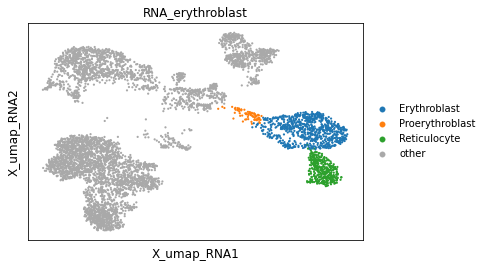

In [37]:
sc.pl.embedding(adata, basis="X_umap_RNA", color="RNA_erythroblast",
                save="_RNA_erythroblast_lineage.pdf")

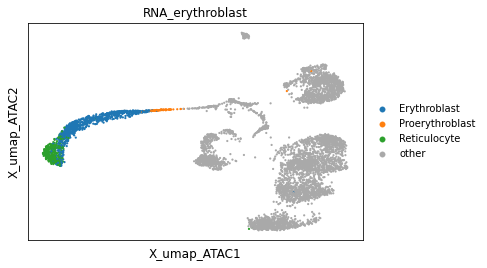

In [41]:
sc.pl.embedding(adata, basis="X_umap_ATAC", color="RNA_erythroblast",
                save="_RNA_erythroblast_lineage.pdf")

### erythroblast - ATAC


In [38]:
erythroblast_atac_map = {'CD4+ T naive':"other",
 'Lymph prog':"other",
 'CD4+ T activated':"other",
 'Proerythroblast, Erythroblast':"Proerythroblast, Erythroblast",
 'CD4+ T activated, CD8+ T':"other",
 'Naive CD20+ B':"other",
 'CD14+ Mono, ID2-hi myeloid prog':"other",
 'HSC':"other",
 'NK':"other",
 'Erythroblast, Reticulocyte':"Erythroblast, Reticulocyte",
 'pDCs':"other",
 'B1 B':"other",
 'Reticulocyte':"Reticulocyte",
 'ILC':"other",
 'CD14+ Mono, CD16+ Mono':"other",
 'MK/E prog':"other",
 'HSPC/Mono prog':"other",
 'low quality T cells':"other",
 'CD14+ Mono, cDC2':"other",
 'Transitional B':"other",
 'Plasma cells':"other",
 'low quality cells':"other"}


In [39]:
# map the dictionary for erythroblast populations
adata.obs["ATAC_erythroblast"] = adata.obs["atac_ann"].map(erythroblast_atac_map)
adata.obs["ATAC_erythroblast"]

# define the color codes for the UMAP
adata.uns["ATAC_erythroblast_colors"] = ['#1f77b4', '#ff7f0e', '#2ca02c', '#A9A9A9']

/home/yangjoon.kim/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'ATAC_erythroblast' as categorical


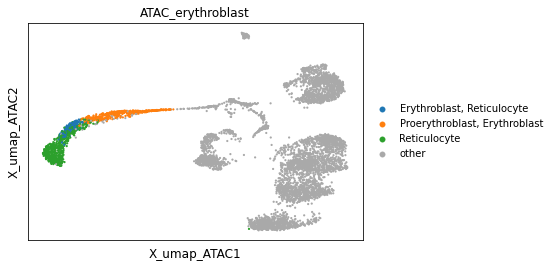

In [40]:
sc.pl.embedding(adata, basis="X_umap_ATAC", color="ATAC_erythroblast",
                save="_ATAC_erythroblast_lineage.pdf")

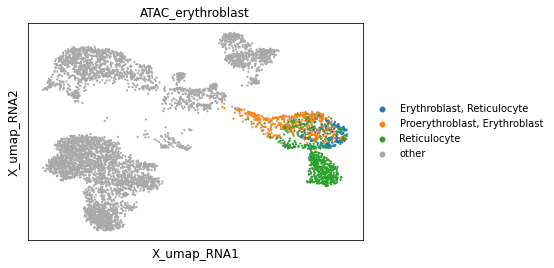

In [42]:
sc.pl.embedding(adata, basis="X_umap_RNA", color="ATAC_erythroblast",
                save="_ATAC_erythroblast_lineage.pdf")

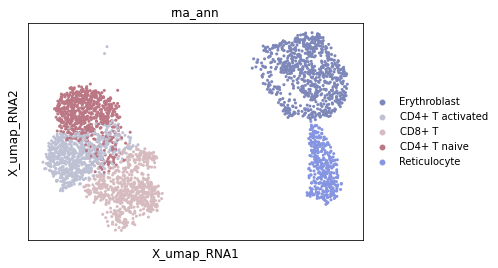

Trying to set attribute `._uns` of view, copying.


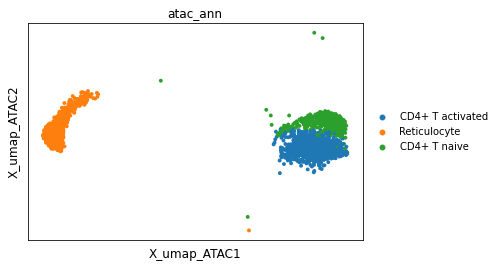

In [21]:
# check the subset of cell-types for their granularity in UMAP
cell_types_plot = ["Erythroblast","Reticulocyte","CD4+ T naive","CD4+ T activated","CD8+ T"]

adata_subset_RNA = adata[adata.obs["rna_ann"].isin(cell_types_plot)]
sc.pl.embedding(adata_subset, basis="X_umap_RNA", color=["rna_ann"])

adata_subset_ATAC = adata[adata.obs["atac_ann"].isin(cell_types_plot)]
sc.pl.embedding(adata_subset_ATAC, basis="X_umap_ATAC", color=["atac_ann"])

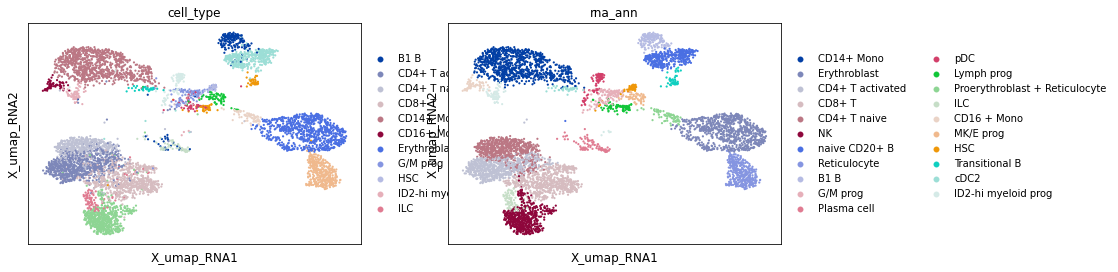

In [11]:
sc.pl.embedding(adata, basis="X_umap_RNA", color=["cell_type","rna_ann"])


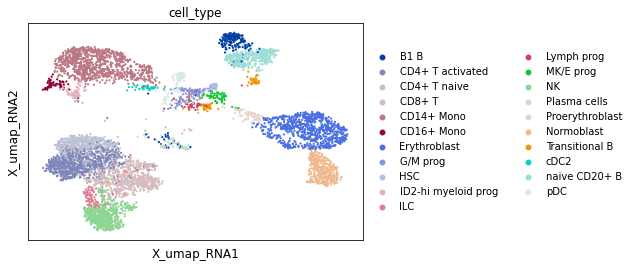

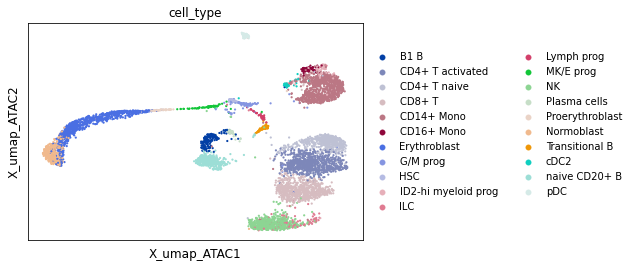

In [46]:
# RNA UMAP and ATAC UMAP with final joint annotations
sc.pl.embedding(adata, basis="X_umap_RNA", color="cell_type", 
                save="_neurips_s1d1_RNA_UMAP+joint_annotation.pdf")

sc.pl.embedding(adata, basis="X_umap_ATAC", color="cell_type",
                save="_neurips_s1d1_ATAC_UMAP+joint_annotation.pdf")

## Checking marker gene expressions

In [53]:
# edit the gene names as we've added "-RNA" or "-ATAC" to merge the two modalities
#RNA
marker_genes_rna = {
    'CD14+ Mono': ['FCN1', 'CD14'],
    'CD16+ Mono': ['TCF7L2', 'FCGR3A', 'LYN'],
    'ID2-hi myeloid prog': ['CD14', 'ID2', 'VCAN', 'S100A9', 'CLEC12A', 'KLF4', 'PLAUR'],
    'cDC1': ['CLEC9A', 'CADM1'],
    'cDC2': ['CLEC10A', 'FCER1A', 'CST3', 'COTL1', 'LYZ', 'DMXL2'], # Note: DMXL2 should be negative
    'Reticulocyte': ['SLC4A1', 'SLC25A37', 'HBB', 'HBA2', 'HBA1', 'TFRC'],
    'Erythroblast': ['MKI67', 'HBA1', 'HBB'],
    'Proerythroblast': ['CDK6', 'SYNGR1', 'HBM', 'GYPA'], # Note HBM and GYPA are negative markers
    'NK': ['GNLY', 'NKG7', 'CD247', 'GRIK4', 'FCER1G', 'TYROBP', 'KLRG1', 'FCGR3A'],
    'ILC': ['ID2', 'PLCG2', 'GNLY', 'SYNE1'],
    'Lymph prog': ['IGLL1', 'VPREB1', 'MME', 'EBF1', 'SSBP2', 'BACH2', 'CD79B', 'IGHM', 'PAX5', 'PRKCE', 'DNTT'],
    'Naive CD20+ B': ['MS4A1', 'IL4R', 'IGHD', 'FCRL1', 'IGHM'],
    'B1 B': ['MS4A1', 'SSPN', 'ITGB1', 'EPHA4', 'COL4A4', 'PRDM1', 'ZNF215', 'IRF4', 'CD38', 'XBP1', 'PAX5', 'BCL11A', 'BLK', 'IGHD', 'IGHM'], # Note IGHD and IGHM are negative markers
    'Transitional B': ['MME', 'CD38', 'CD24', 'ACSM3', 'MSI2'],
    'Plasma cells': ['MZB1', 'HSP90B1', 'FNDC3B', 'PRDM1', 'IGKC', 'JCHAIN'],
    'Plasmablast': ['XBP1', 'RF4', 'PRDM1', 'PAX5'],  # Note PAX5 is a negative marker
    'CD4+ T activated': ['CD4', 'IL7R', 'TRBC2', 'ITGB1'],
    'CD4+ T naive': ['CD4', 'IL7R', 'TRBC2', 'CCR7'],
    'CD8+ T': ['CD8A', 'CD8B', 'GZMB', 'GZMA', 'CCL5', 'GZMK', 'GZMH', 'GZMA'],
    'T activation': ['CD69', 'CD38'], # CD69 much better marker!
    'T naive': ['LEF1', 'CCR7', 'TCF7'],
    'pDCs': ['GZMB', 'IL3RA', 'COBLL1', 'TCF4'],
    'G/M prog': ['MPO', 'BCL2', 'KCNQ5', 'CSF3R', 'PRTN3'],
    'HSC': ['NRIP1', 'MECOM', 'PROM1', 'CD34', 'NKAIN2'],
    'MK/E prog': ['ZNF385D', 'ITGA2B', 'RYR3', 'PLCB1'] # Note PLCB1 is a negative marker
}

for cell_type in marker_genes_rna:
    genes = marker_genes_rna[cell_type]
    new_genes = [gene + "-RNA" for gene in genes]
    marker_genes_rna[cell_type] = new_genes
    
marker_genes_rna

#ATAC
marker_genes_atac = {
    'CD14+ Mono': ['TREM1', 'FPR1'],
    'CD16+ Mono': ['LYN', 'TCF7L2'],
    'ID2-hi myeloid prog': ['KLF4'],
    'cDC2': ['TREM1', 'DMXL2'], # Note: DMXL2 should be negative
    'Reticulocyte': ['GATA1', 'HBA1', 'SLC4A1', 'SLC25A37', 'KLF1'],
    'Erythroblast': ['GATA1', 'MKI67'],
    'Proerythroblast': ['GATA2', 'CRACD', 'SYNGR1'],
    'NK': ['CD160', 'GNLY', 'GRIK4', 'CD247'],
    'ILC': ['SPON2', 'GZMB', 'PRF1', 'C69'], # Note CD69 should be negative
    'Lymph prog': ['MME', 'IGLL1', 'VPREB1', 'CD79B'],
    'Naive CD20+ B': ['MS4A1', 'LYN', 'CD74', 'BLK'],
    'B1 B': ['ITGB1', 'MS4A1', 'DUSP22', 'EPHA4'],
    'Transitional B': ['MME', 'CD38', 'CD24'],
    'Plasma cells': ['DUSP22', 'FNDC3B'],
    'CD4+ T activated': ['JAKMIP1', 'C4orf50'],
    'CD4+ T naive': [ 'BCL11B', 'BACH2', 'JAKMIP1', 'C4orf50'], # Note JAKMIP1 and C4orf50 are negative markers
    'CD8+ T': ['CD8A', 'CD8B'],
    'pDCs': ['PTPRS', 'TCF4', 'KCNN3', 'DUSP22'],
    'G/M prog': ['MPO','NT5DC3'],
    'HSC': ['PRDM16','TAMALIN','MTRNR2L1'],
    'MK/E prog': ['DNAJC6']
}

for cell_type in marker_genes_atac:
    genes = marker_genes_atac[cell_type]
    new_genes = [gene + "-ATAC" for gene in genes]
    marker_genes_atac[cell_type] = new_genes
    
marker_genes_atac

{'CD14+ Mono': ['TREM1-ATAC', 'FPR1-ATAC'],
 'CD16+ Mono': ['LYN-ATAC', 'TCF7L2-ATAC'],
 'ID2-hi myeloid prog': ['KLF4-ATAC'],
 'cDC2': ['TREM1-ATAC', 'DMXL2-ATAC'],
 'Reticulocyte': ['GATA1-ATAC',
  'HBA1-ATAC',
  'SLC4A1-ATAC',
  'SLC25A37-ATAC',
  'KLF1-ATAC'],
 'Erythroblast': ['GATA1-ATAC', 'MKI67-ATAC'],
 'Proerythroblast': ['GATA2-ATAC', 'CRACD-ATAC', 'SYNGR1-ATAC'],
 'NK': ['CD160-ATAC', 'GNLY-ATAC', 'GRIK4-ATAC', 'CD247-ATAC'],
 'ILC': ['SPON2-ATAC', 'GZMB-ATAC', 'PRF1-ATAC', 'C69-ATAC'],
 'Lymph prog': ['MME-ATAC', 'IGLL1-ATAC', 'VPREB1-ATAC', 'CD79B-ATAC'],
 'Naive CD20+ B': ['MS4A1-ATAC', 'LYN-ATAC', 'CD74-ATAC', 'BLK-ATAC'],
 'B1 B': ['ITGB1-ATAC', 'MS4A1-ATAC', 'DUSP22-ATAC', 'EPHA4-ATAC'],
 'Transitional B': ['MME-ATAC', 'CD38-ATAC', 'CD24-ATAC'],
 'Plasma cells': ['DUSP22-ATAC', 'FNDC3B-ATAC'],
 'CD4+ T activated': ['JAKMIP1-ATAC', 'C4orf50-ATAC'],
 'CD4+ T naive': ['BCL11B-ATAC', 'BACH2-ATAC', 'JAKMIP1-ATAC', 'C4orf50-ATAC'],
 'CD8+ T': ['CD8A-ATAC', 'CD8B-ATAC'],
 'pD

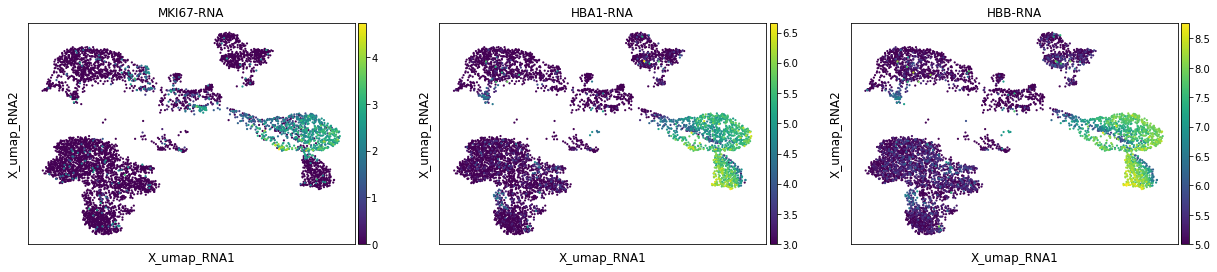

In [72]:
sc.pl.embedding(adata, basis="X_umap_RNA", color=marker_genes_rna["Erythroblast"],
                vmin=[0, 3, 5])

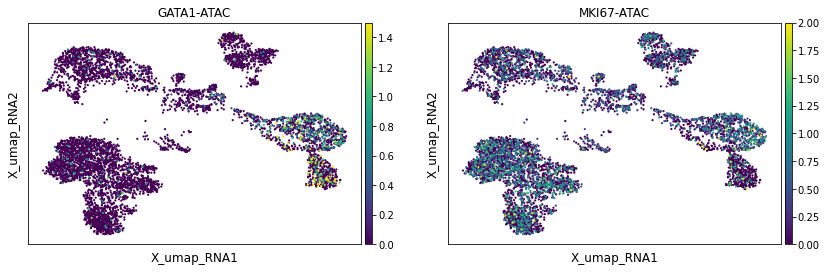

In [78]:
sc.pl.embedding(adata, basis="X_umap_RNA", color=marker_genes_atac["Erythroblast"],
                vmin=[0, 0], vmax=[1.5,2])

### summation of log-normalized counts for several marker genes


In [67]:
# define the gene sets for RNA and ATAC modalities
gene_sets = marker_genes_rna["Erythroblast"] + marker_genes_atac["Erythroblast"]
gene_sets

# make a dataframe of count matrices for easier slicing
count_matrices = pd.DataFrame(data=adata.X.todense(),
                              index=adata.obs_names,
                              columns=adata.var_names)
count_matrices

# add a new adata.obs for the summation of log-normalized counts
adata.obs["erythroblast_score"] = np.sum(count_matrices.loc[:,gene_sets],1)

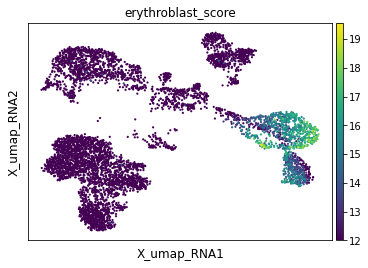

In [71]:
sc.pl.embedding(adata, basis="X_umap_RNA", color=["erythroblast_score"], vmin=12)

In [ ]:
# #RNA
# marker_genes_rna = {
#     'CD14+ Mono': ['FCN1', 'CD14'],
#     'CD16+ Mono': ['TCF7L2', 'FCGR3A', 'LYN'],
#     'ID2-hi myeloid prog': ['CD14', 'ID2', 'VCAN', 'S100A9', 'CLEC12A', 'KLF4', 'PLAUR'],
#     'cDC1': ['CLEC9A', 'CADM1'],
#     'cDC2': ['CLEC10A', 'FCER1A', 'CST3', 'COTL1', 'LYZ', 'DMXL2'], # Note: DMXL2 should be negative
#     'Reticulocyte': ['SLC4A1', 'SLC25A37', 'HBB', 'HBA2', 'HBA1', 'TFRC'],
#     'Erythroblast': ['MKI67', 'HBA1', 'HBB'],
#     'Proerythroblast': ['CDK6', 'SYNGR1', 'HBM', 'GYPA'], # Note HBM and GYPA are negative markers
#     'NK': ['GNLY', 'NKG7', 'CD247', 'GRIK4', 'FCER1G', 'TYROBP', 'KLRG1', 'FCGR3A'],
#     'ILC': ['ID2', 'PLCG2', 'GNLY', 'SYNE1'],
#     'Lymph prog': ['IGLL1', 'VPREB1', 'MME', 'EBF1', 'SSBP2', 'BACH2', 'CD79B', 'IGHM', 'PAX5', 'PRKCE', 'DNTT'],
#     'Naive CD20+ B': ['MS4A1', 'IL4R', 'IGHD', 'FCRL1', 'IGHM'],
#     'B1 B': ['MS4A1', 'SSPN', 'ITGB1', 'EPHA4', 'COL4A4', 'PRDM1', 'ZNF215', 'IRF4', 'CD38', 'XBP1', 'PAX5', 'BCL11A', 'BLK', 'IGHD', 'IGHM'], # Note IGHD and IGHM are negative markers
#     'Transitional B': ['MME', 'CD38', 'CD24', 'ACSM3', 'MSI2'],
#     'Plasma cells': ['MZB1', 'HSP90B1', 'FNDC3B', 'PRDM1', 'IGKC', 'JCHAIN'],
#     'Plasmablast': ['XBP1', 'RF4', 'PRDM1', 'PAX5'],  # Note PAX5 is a negative marker
#     'CD4+ T activated': ['CD4', 'IL7R', 'TRBC2', 'ITGB1'],
#     'CD4+ T naive': ['CD4', 'IL7R', 'TRBC2', 'CCR7'],
#     'CD8+ T': ['CD8A', 'CD8B', 'GZMB', 'GZMA', 'CCL5', 'GZMK', 'GZMH', 'GZMA'],
#     'T activation': ['CD69', 'CD38'], # CD69 much better marker!
#     'T naive': ['LEF1', 'CCR7', 'TCF7'],
#     'pDCs': ['GZMB', 'IL3RA', 'COBLL1', 'TCF4'],
#     'G/M prog': ['MPO', 'BCL2', 'KCNQ5', 'CSF3R', 'PRTN3'],
#     'HSC': ['NRIP1', 'MECOM', 'PROM1', 'CD34', 'NKAIN2'],
#     'MK/E prog': ['ZNF385D', 'ITGA2B', 'RYR3', 'PLCB1'] # Note PLCB1 is a negative marker
# }

# #ATAC
# marker_genes_atac = {
#     'CD14+ Mono': ['TREM1', 'FPR1'],
#     'CD16+ Mono': ['LYN', 'TCF7L2'],
#     'ID2-hi myeloid prog': ['KLF4'],
#     'cDC2': ['TREM1', 'DMXL2'], # Note: DMXL2 should be negative
#     'Reticulocyte': ['GATA1', 'HBA1', 'SLC4A1', 'SLC25A37', 'KLF1'],
#     'Erythroblast': ['GATA1', 'MKI67'],
#     'Proerythroblast': ['GATA2', 'CRACD', 'SYNGR1'],
#     'NK': ['CD160', 'GNLY', 'GRIK4', 'CD247'],
#     'ILC': ['SPON2', 'GZMB', 'PRF1', 'C69'], # Note CD69 should be negative
#     'Lymph prog': ['MME', 'IGLL1', 'VPREB1', 'CD79B'],
#     'Naive CD20+ B': ['MS4A1', 'LYN', 'CD74', 'BLK'],
#     'B1 B': ['ITGB1', 'MS4A1', 'DUSP22', 'EPHA4'],
#     'Transitional B': ['MME', 'CD38', 'CD24'],
#     'Plasma cells': ['DUSP22', 'FNDC3B'],
#     'CD4+ T activated': ['JAKMIP1', 'C4orf50'],
#     'CD4+ T naive': [ 'BCL11B', 'BACH2', 'JAKMIP1', 'C4orf50'], # Note JAKMIP1 and C4orf50 are negative markers
#     'CD8+ T': ['CD8A', 'CD8B'],
#     'pDCs': ['PTPRS', 'TCF4', 'KCNN3', 'DUSP22'],
#     'G/M prog': ['MPO','NT5DC3'],
#     'HSC': ['PRDM16','TAMALIN','MTRNR2L1'],
#     'MK/E prog': ['DNAJC6']
# }

